In [1]:
import pandas as pd 

sales_transactions = pd.read_csv("sales_transactions.csv")

# Aggregate total sales per customer
customer_sales = sales_transactions.groupby("Customer ID")["Total Sales"].sum().reset_index()

# Define segmentation criteria based on percentiles
high_threshold = customer_sales["Total Sales"].quantile(0.75)  # Top 25%
low_threshold = customer_sales["Total Sales"].quantile(0.25)   # Bottom 25%

# Function to assign Customer Tier
def categorize_customer(sales):
    if sales >= high_threshold:
        return "High-Value"
    elif sales >= low_threshold:
        return "Mid-Tier"
    else:
        return "Low-Value"

# Apply categorization
customer_sales["Customer Tier"] = customer_sales["Total Sales"].apply(categorize_customer)

# Verify the results
print(customer_sales.head())


   Customer ID  Total Sales Customer Tier
0            1    146941.22    High-Value
1            2     83056.35     Low-Value
2            3    105387.01      Mid-Tier
3            4    119775.16      Mid-Tier
4            5     94324.30     Low-Value


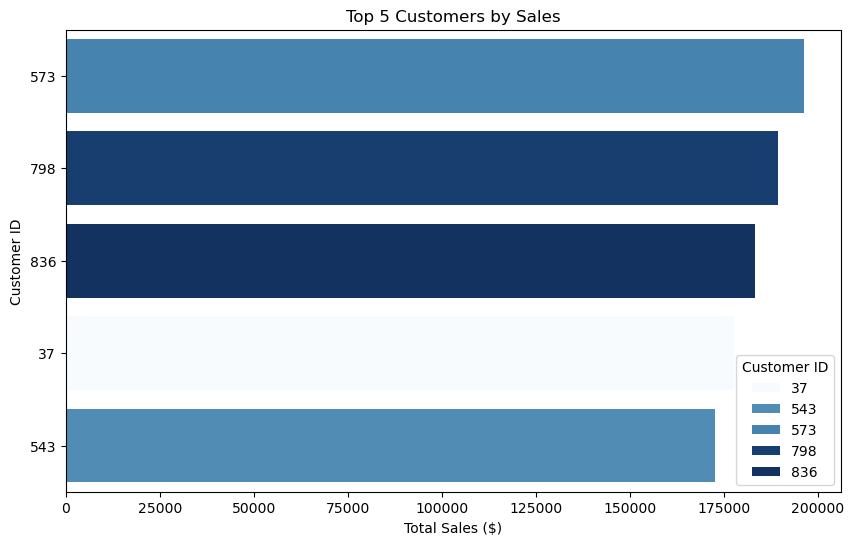

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Aggregate total sales per customer
top_customers = sales_transactions.groupby("Customer ID")["Total Sales"].sum().reset_index()

# Sort the total sales in descending order and select top 5
top_customers = top_customers.sort_values(by="Total Sales", ascending=False).head(5)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Total Sales", y=top_customers["Customer ID"].astype(str), data=top_customers, hue="Customer ID", palette="Blues")

plt.xlabel("Total Sales ($)")
plt.ylabel("Customer ID")
plt.title("Top 5 Customers by Sales")
plt.show()

C:\Users\sudchan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


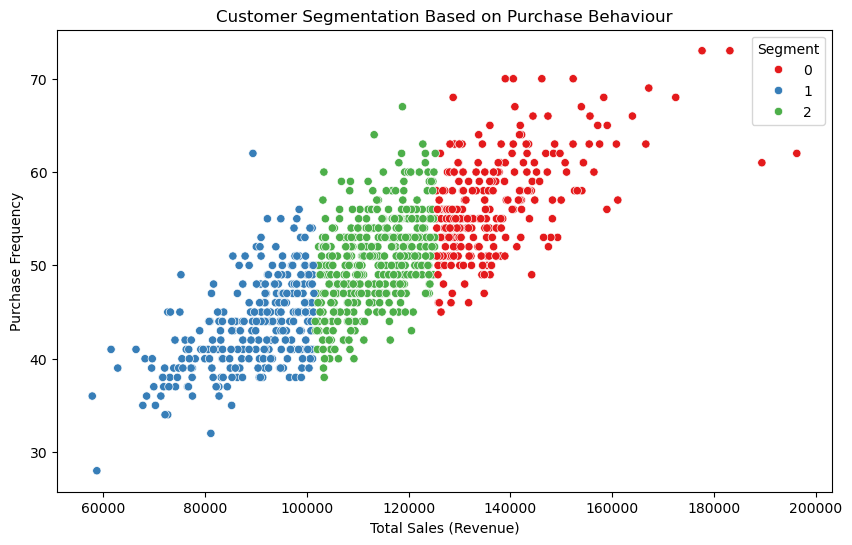

    Customer ID  Total_Sales  Purchase_Frequency  Segment
0             1    146941.22                  62        0
1             2     83056.35                  42        1
2             3    105387.01                  54        2
3             4    119775.16                  52        2
4             5     94324.30                  45        1
5             6    107533.56                  50        2
6             7     99549.91                  50        1
7             8     88632.62                  50        1
8             9    123653.38                  50        2
9            10     80723.23                  44        1
10           11    135993.89                  49        0
11           12     87435.01                  41        1
12           13    155625.86                  66        0
13           14     99624.07                  50        1
14           15    132225.44                  51        0
15           16    143570.04                  63        0
16           1

In [36]:
from sklearn.cluster import KMeans

# Aggregating total revenue and purchase frequency per customer
customer_data = sales_transactions.groupby("Customer ID").agg(
    Total_Sales=("Total Sales", "sum"),
    Purchase_Frequency=("Customer ID", "count")
).reset_index()

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3,  random_state=42)
customer_data["Segment"] = kmeans.fit_predict(customer_data[["Total_Sales", "Purchase_Frequency"]])

# Visualize customer segment
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total_Sales", y="Purchase_Frequency", hue=customer_data["Segment"], palette="Set1", data=customer_data)

#Labels and Title
plt.xlabel("Total Sales (Revenue)")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation Based on Purchase Behaviour")
plt.legend(title="Segment")
plt.show()

print(customer_data.head(20))